In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp

In [2]:
def make_Ak(k, d=10):
    A = np.zeros((d, d))
    for i in range(1, d+1):
        for j in range(1, d+1):
            if i < j:
                A[i-1, j-1] = np.exp(i/j) * np.cos(i*j) * np.sin(k)
    A += A.T
    for i in range(1, d+1):
        A[i-1, i-1] = i/d * np.abs(np.sin(k)) + np.sum(np.abs(A[i-1, :])) 
    return A

def make_bk(k, d=10):
    b = np.zeros(d)
    for i in range(1, d+1):
        b[i-1] = np.exp(i/k) * np.sin(i*k)
    return b

In [3]:
Ak_list = [make_Ak(k) for k in range(1, 6)]
bk_list = [make_bk(k) for k in range(1, 6)]

In [4]:
get_fk = lambda x: [x.T @ Ak_list[i] @ x - bk_list[i].T @ x for i in range(5)]

In [5]:
x_init = np.ones(10)
max(get_fk(x_init))

5337.066429311364

In [20]:
x = cp.Variable(10)
loss = cp.max(cp.hstack([cp.quad_form(x, Ak_list[k]) - bk_list[k] @ x for k in range(5)]))
prob = cp.Problem(cp.Minimize(loss))
f_opt = prob.solve()
print(f_opt)

-0.8414083342082413


In [21]:
def subgrad_descent(learning_rate_choice=0, max_iter=100000, tol=1e-3, C=0.001):
    x = np.ones(10)
    f_best_at_t = np.zeros(max_iter)
    f_best_at_t[0] = max(get_fk(x))
    for t in range(1, max_iter):
        fk = get_fk(x)
        k_active = np.argmax(fk) # k s.t. fk = f (0 indexed)
        # g is a subgradient of f at x if it is a subgradient of fk at x where fk(x) = f(x)
        g = 2 * Ak_list[k_active] @ x - bk_list[k_active]
        if t % 1e3 == 0:
            print('t = {}, g = {}, f = {}'.format(t, np.linalg.norm(g), max(fk)))
        if np.allclose(g, 0, atol=tol):
            # subgradient = 0 at x
            print('terminate successfully')
            return f_best_at_t[:t]
        
        if learning_rate_choice == 0:
            # decreasing learning rate
            gamma = C / np.sqrt(t)
        elif learning_rate_choice == 1:
            # polyak step size
            gamma = (max(fk) - f_opt) / np.linalg.norm(g) 
        x -= gamma * g / np.linalg.norm(g)
        f = max(get_fk(x))
        if f < f_best_at_t[t-1]:
            f_best_at_t[t] = f
        else:
            f_best_at_t[t] = f_best_at_t[t-1]
    print('reached max iter {}'.format(max_iter))
    return f_best_at_t

In [23]:
f_opt_const = subgrad_descent(C=1)

t = 1000, g = 155.8368742454028, f = 1.152716557347953
t = 2000, g = 37.78147899537297, f = -0.5795346902034679
t = 3000, g = 14.707002396281881, f = -0.6443414546385191
t = 4000, g = 14.612530725260411, f = -0.7334122711308112
t = 5000, g = 155.64214131369746, f = -0.465341482048641
t = 6000, g = 155.634714396385, f = -0.5594885933255016
t = 7000, g = 14.606608008740478, f = -0.7099076571375813
t = 8000, g = 14.553614650989655, f = -0.7674837760705394
t = 9000, g = 37.77606997417043, f = -0.680398254198647
t = 10000, g = 37.78071953826623, f = -0.6381977779441115
t = 11000, g = 14.543381061739025, f = -0.7865621625681266
t = 12000, g = 6.274509567531107, f = -0.7893336782548701
t = 13000, g = 14.515978700826825, f = -0.7975826769952737
t = 14000, g = 37.77457671369416, f = -0.76164417866702
t = 15000, g = 6.276124433433423, f = -0.7979115359460462
t = 16000, g = 14.546620798789428, f = -0.7673788347692445
t = 17000, g = 6.298664012699709, f = -0.7866727078135014
t = 18000, g = 6.17128

In [24]:
f_opt_polyak = subgrad_descent(learning_rate_choice=1)

t = 1000, g = 155.59865415792956, f = -0.8242676543551903
t = 2000, g = 6.194025531119145, f = -0.8378268082831641
t = 3000, g = 14.453344011156634, f = -0.8384947163828257
t = 4000, g = 6.165788615676378, f = -0.8396213827187187
t = 5000, g = 14.45725776079338, f = -0.8400998638727017
t = 6000, g = 37.77398364537565, f = -0.838115758886811
t = 7000, g = 14.460262036084409, f = -0.8401588271397411
t = 8000, g = 37.77382404718027, f = -0.8381044789087482
t = 9000, g = 14.462862845046931, f = -0.8395198074102708
t = 10000, g = 155.57150033231994, f = -0.8396909779411197
t = 11000, g = 6.140285321474895, f = -0.8407565960253952
t = 12000, g = 37.773508005473005, f = -0.8401727630515788
t = 13000, g = 37.77347112783188, f = -0.8402678920941948
t = 14000, g = 37.773438397078856, f = -0.8403490458533869
t = 15000, g = 37.77340895501023, f = -0.8404192570265052
t = 16000, g = 37.773382460312405, f = -0.8404807154589767
t = 17000, g = 37.77335842423501, f = -0.8405346105481009
t = 18000, g = 6

Text(0, 0.5, 'suboptimality gap (log scale)')

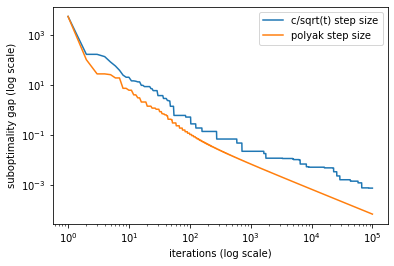

In [25]:
num_iter = np.arange(1, f_opt_const.size+1)
plt.loglog(num_iter, f_opt_const - f_opt, label='c/sqrt(t) step size')
plt.loglog(num_iter, f_opt_polyak - f_opt, label='polyak step size')
plt.legend()
plt.xlabel('iterations (log scale)')
plt.ylabel('suboptimality gap (log scale)')